In [38]:
import torch
import torch.optim as optim
import numpy as np

In [39]:
def function(x):
    A = 0.5    
    return A*2 + (x[0]**2 - A*torch.cos(2*np.pi*x[0])) + (x[1]**2 - A*torch.cos(2*np.pi*x[1]))

In [40]:
xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = function(torch.tensor([x, y])).numpy()

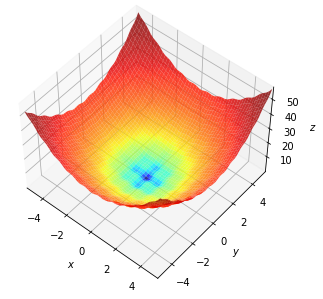

In [41]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

(-5.12, 5.12)

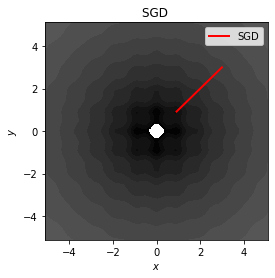

In [42]:
xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = function(torch.tensor([x, y])).numpy()

fig, ax = plt.subplots(figsize=(4, 4))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

p = torch.tensor([[3.0],[3.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)

path = np.empty((2,0))
path = np.append(path, p.data.numpy(), axis=1)
output_list_sgd = []

for i in range(100):
    opt.zero_grad()
    output = function(p)
    output_temp = output
    output_list_sgd.append(output_temp.detach().numpy())
    output.backward()
    opt.step()
    path = np.append(path, p.data.numpy(), axis=1)

ax.plot(path[0], path[1], color='red', label='SGD', linewidth=2)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('SGD ')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

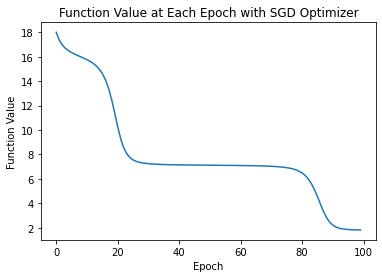

In [51]:
plt.plot([i for i in range(100)], output_list_sgd)
plt.xlabel('Epoch')
plt.ylabel('Function Value')
plt.title('Function Value at Each Epoch with SGD Optimizer')
plt.show()

(-5.12, 5.12)

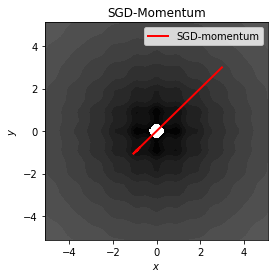

In [44]:
xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = function(torch.tensor([x, y])).numpy()

fig, ax = plt.subplots(figsize=(4, 4))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

p = torch.tensor([[3.0],[3.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum = 0.9)

path = np.empty((2,0))
path = np.append(path, p.data.numpy(), axis=1)
output_list_sgd_mom = []

for i in range(100):
    opt.zero_grad()
    output = function(p)
    output_temp = output
    output_list_sgd_mom.append(output_temp.detach().numpy())
    output.backward()
    opt.step()
    path = np.append(path, p.data.numpy(), axis=1)

ax.plot(path[0], path[1], color='red', label='SGD-momentum', linewidth=2)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('SGD-Momentum')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

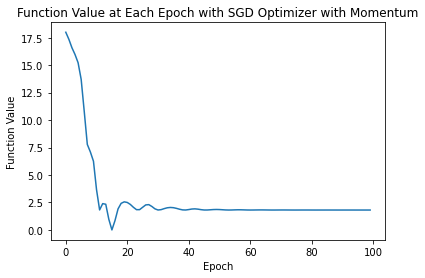

In [52]:
plt.plot([i for i in range(100)], output_list_sgd_mom)
plt.xlabel('Epoch')
plt.ylabel('Function Value')
plt.title('Function Value at Each Epoch with SGD Optimizer with Momentum')
plt.show()

(-5.12, 5.12)

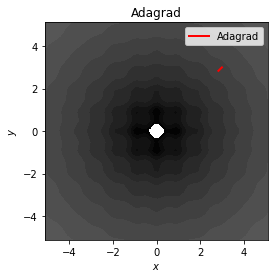

In [46]:
xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = function(torch.tensor([x, y])).numpy()

fig, ax = plt.subplots(figsize=(4, 4))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

p = torch.tensor([[3.0],[3.0]], requires_grad=True)
opt = optim.Adagrad([p], lr=0.01)

path = np.empty((2,0))
path = np.append(path, p.data.numpy(), axis=1)
output_list_ada = []

for i in range(100):
    opt.zero_grad()
    output = function(p)
    output_temp = output
    output_list_ada.append(output_temp.detach().numpy())
    output.backward()
    opt.step()
    path = np.append(path, p.data.numpy(), axis=1)

ax.plot(path[0], path[1], color='red', label='Adagrad', linewidth=2)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Adagrad')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

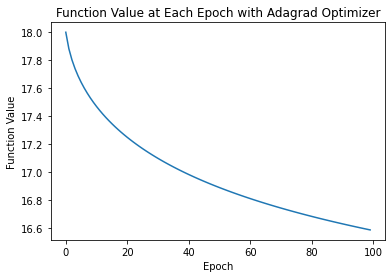

In [53]:
plt.plot([i for i in range(100)], output_list_ada)
plt.xlabel('Epoch')
plt.ylabel('Function Value')
plt.title('Function Value at Each Epoch with Adagrad Optimizer')
plt.show()

(-5.12, 5.12)

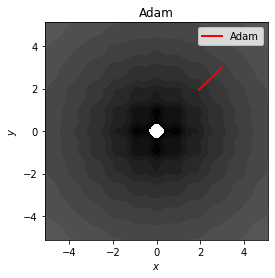

In [48]:
xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = function(torch.tensor([x, y])).numpy()

fig, ax = plt.subplots(figsize=(4, 4))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

p = torch.tensor([[3.0],[3.0]], requires_grad=True)
opt = optim.Adam([p], lr=0.01)

path = np.empty((2,0))
path = np.append(path, p.data.numpy(), axis=1)
output_list_adam = []

for i in range(100):
    opt.zero_grad()
    output = function(p)
    output_temp = output
    output_list_adam.append(output_temp.detach().numpy())
    output.backward()
    opt.step()
    path = np.append(path, p.data.numpy(), axis=1)

ax.plot(path[0], path[1], color='red', label='Adam', linewidth=2)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Adam')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

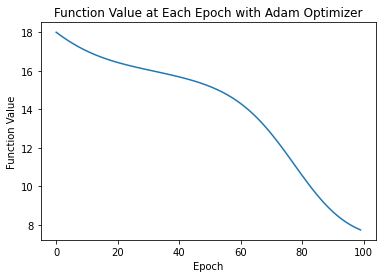

In [54]:
plt.plot([i for i in range(100)], output_list_adam)
plt.xlabel('Epoch')
plt.ylabel('Function Value')
plt.title('Function Value at Each Epoch with Adam Optimizer')
plt.show()

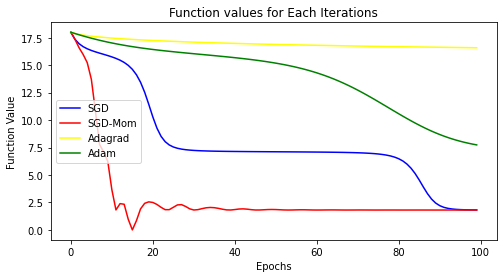

In [64]:
plt.figure(figsize = (8, 4))
plt.plot(output_list_sgd, color = 'blue', label = 'SGD')
plt.plot(output_list_sgd_mom, color = 'red', label = 'SGD-Mom')
plt.plot(output_list_ada, color = 'yellow', label = 'Adagrad')
plt.plot(output_list_adam, color = 'green', label = 'Adam')
plt.legend()
plt.ylabel('Function Value')
plt.xlabel('Epochs')
plt.title('Function values for Each Iterations')
plt.show()

In [70]:
import pandas  as  pd

In [84]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df = df.sample(frac=1, random_state=0) #shuffle
df = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])] #filter
# add label indices column
mapping = {k: v for v, k in enumerate(df [4]. unique())} 
df[5] = (2 * df[4].map(mapping)) - 1 #labels in {−1,1}

# normalise data
alldata = torch.tensor(df.iloc[:, [0,1,2,3]].values, dtype=torch.float)
alldata = (alldata - alldata.mean(dim=0)) / alldata.var(dim=0)
# create datasets
targets_tr = torch.tensor(df.iloc[:75, 5].values, dtype=torch.long) 
targets_va = torch.tensor(df.iloc[75:, 5].values, dtype=torch.long) 
data_tr = alldata [:75]
data_va = alldata [75:]

In [85]:
def hinge_loss(y_pred, y_true):
    #return torch.mean(torch.max(0, 1- torch.mm(y_pred,y_true)))
    return torch.mean(torch.clamp(1 - y_pred.mul(y_true), min=0))

In [86]:
def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

In [87]:
from torch.utils import data

dataset = data.TensorDataset(data_tr,targets_tr) # create your datset
dataloader = data.DataLoader(dataset, batch_size=25, shuffle=True) # create your dataloader

In [129]:
def acc(y_true, y_pred):
    y_pred[torch.where(y_pred <= 0.)] = -1
    y_pred[torch.where(y_pred > 0.)] = 1
    train_acc = torch.sum(y_pred == y_true)
    final_train_acc = train_acc/y_true.shape[0]
    return final_train_acc.numpy()

In [130]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
loss_ls_sgd = []
acc_ls_sgd = []

for epoch in range(100):
    for batch in dataloader:
        opt.zero_grad()
        svm_vals = svm(batch[0], w, b)
        output = hinge_loss(svm_vals, batch[1])
        output.backward()
        opt.step()
    y_preds = svm(data_va, w, b)
    loss_ls_sgd.append(hinge_loss(y_preds, targets_va).detach().numpy())
    acc_ls_sgd.append(acc(targets_va, y_preds))

In [131]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

opt = optim.SGD([w,b], lr=0.001, weight_decay=0.0001)
loss_ls_sgd_001 = []
acc_ls_sgd_001 = []

for epoch in range(100):
    for batch in dataloader:
        opt.zero_grad()
        svm_vals = svm(batch[0], w, b)
        output = hinge_loss(svm_vals, batch[1])
        output.backward()
        opt.step()
    y_preds = svm(data_va, w, b)
    loss_ls_sgd_001.append(hinge_loss(y_preds, targets_va).detach().numpy())
    acc_ls_sgd_001.append(acc(targets_va, y_preds))

In [105]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

opt = optim.SGD([w,b], lr=0.0001, weight_decay=0.0001)
loss_ls_sgd_0001 = []
acc_ls_sgd_0001 = []

for epoch in range(100):
    for batch in dataloader:
        opt.zero_grad()
        svm_vals = svm(batch[0], w, b)
        output = hinge_loss(svm_vals, batch[1])
        output.backward()
        opt.step()
    y_preds = svm(data_va, w, b)
    loss_ls_sgd_0001.append(hinge_loss(y_preds, targets_va).detach().numpy())
    acc_ls_sgd_0001.append(acc(targets_va, y_preds))

In [106]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)
loss_ls_adam_01 = []
acc_ls_adam_01 = []

for epoch in range(100):
    for batch in dataloader:
        opt.zero_grad()
        svm_vals = svm(batch[0], w, b)
        output = hinge_loss(svm_vals, batch[1])
        output.backward()
        opt.step()
    y_preds = svm(data_va, w, b)
    loss_ls_adam_01.append(hinge_loss(y_preds, targets_va).detach().numpy())
    acc_ls_adam_01.append(acc(targets_va, y_preds))

In [107]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

opt = optim.Adam([w,b], lr=0.001, weight_decay=0.0001)
loss_ls_adam_001 = []
acc_ls_adam_001 = []

for epoch in range(100):
    for batch in dataloader:
        opt.zero_grad()
        svm_vals = svm(batch[0], w, b)
        output = hinge_loss(svm_vals, batch[1])
        output.backward()
        opt.step()
    y_preds = svm(data_va, w, b)
    loss_ls_adam_001.append(hinge_loss(y_preds, targets_va).detach().numpy())
    acc_ls_adam_001.append(acc(targets_va, y_preds))

In [111]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

opt = optim.Adam([w,b], lr=0.0001, weight_decay=0.0001)
loss_ls_adam_0001 = []
acc_ls_adam_0001 = []

for epoch in range(100):
    for batch in dataloader:
        opt.zero_grad()
        svm_vals = svm(batch[0], w, b)
        output = hinge_loss(svm_vals, batch[1])
        output.backward()
        opt.step()
    y_preds = svm(data_va, w, b)
    loss_ls_adam_0001.append(hinge_loss(y_preds, targets_va).detach().numpy())
    acc_ls_adam_0001.append(acc(targets_va, y_preds))

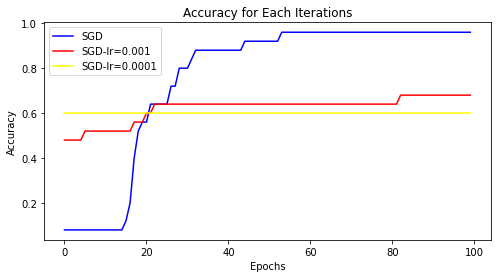

In [112]:
plt.figure(figsize = (8, 4))
plt.plot(acc_ls_sgd, color = 'blue', label = 'SGD')
plt.plot(acc_ls_sgd_001, color = 'red', label = 'SGD-lr=0.001')
plt.plot(acc_ls_sgd_0001, color = 'yellow', label = 'SGD-lr=0.0001')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy for Each Iterations')
plt.show()

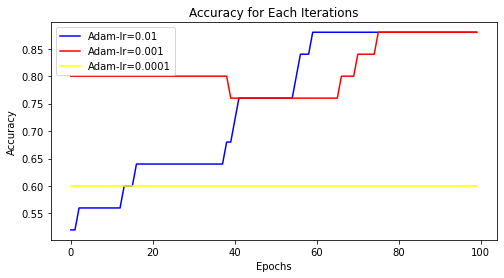

In [115]:
plt.figure(figsize = (8, 4))
plt.plot(acc_ls_adam_01, color = 'blue', label = 'Adam-lr=0.01')
plt.plot(acc_ls_adam_001, color = 'red', label = 'Adam-lr=0.001')
plt.plot(acc_ls_sgd_0001, color = 'yellow', label = 'Adam-lr=0.0001')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy for Each Iterations')
plt.show()

In [125]:
def sgd_01():
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
    loss_ls_sgd = []
    acc_ls_sgd = []

    for epoch in range(100):
        for batch in dataloader:
            opt.zero_grad()
            svm_vals = svm(batch[0], w, b)
            output = hinge_loss(svm_vals, batch[1])
            output.backward()
            opt.step()
        y_preds = svm(data_va, w, b)
        loss_ls_sgd.append(hinge_loss(y_preds, targets_va).detach().numpy())
        acc_ls_sgd.append(acc(targets_va, y_preds))
    hel = acc_ls_sgd[-1]
    return hel

In [117]:
def sgd_001():
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    opt = optim.SGD([w,b], lr=0.001, weight_decay=0.0001)
    loss_ls_sgd_001 = []
    acc_ls_sgd_001 = []

    for epoch in range(100):
        for batch in dataloader:
            opt.zero_grad()
            svm_vals = svm(batch[0], w, b)
            output = hinge_loss(svm_vals, batch[1])
            output.backward()
            opt.step()
        y_preds = svm(data_va, w, b)
        loss_ls_sgd_001.append(hinge_loss(y_preds, targets_va).detach().numpy())
        acc_ls_sgd_001.append(acc(targets_va, y_preds))
    return acc_ls_sgd_001[-1]

In [118]:
def sgd_0001():
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    opt = optim.SGD([w,b], lr=0.0001, weight_decay=0.0001)
    loss_ls_sgd_0001 = []
    acc_ls_sgd_0001 = []

    for epoch in range(100):
        for batch in dataloader:
            opt.zero_grad()
            svm_vals = svm(batch[0], w, b)
            output = hinge_loss(svm_vals, batch[1])
            output.backward()
            opt.step()
        y_preds = svm(data_va, w, b)
        loss_ls_sgd_0001.append(hinge_loss(y_preds, targets_va).detach().numpy())
        acc_ls_sgd_0001.append(acc(targets_va, y_preds))
    return acc_ls_sgd_0001[-1]

In [119]:
def adam_01():
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)
    loss_ls_adam_01 = []
    acc_ls_adam_01 = []

    for epoch in range(100):
        for batch in dataloader:
            opt.zero_grad()
            svm_vals = svm(batch[0], w, b)
            output = hinge_loss(svm_vals, batch[1])
            output.backward()
            opt.step()
        y_preds = svm(data_va, w, b)
        loss_ls_adam_01.append(hinge_loss(y_preds, targets_va).detach().numpy())
        acc_ls_adam_01.append(acc(targets_va, y_preds))
    return acc_ls_adam_01[-1]

In [120]:
def adam_001():
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    opt = optim.Adam([w,b], lr=0.001, weight_decay=0.0001)
    loss_ls_adam_001 = []
    acc_ls_adam_001 = []

    for epoch in range(100):
        for batch in dataloader:
            opt.zero_grad()
            svm_vals = svm(batch[0], w, b)
            output = hinge_loss(svm_vals, batch[1])
            output.backward()
            opt.step()
        y_preds = svm(data_va, w, b)
        loss_ls_adam_001.append(hinge_loss(y_preds, targets_va).detach().numpy())
        acc_ls_adam_001.append(acc(targets_va, y_preds))
    return acc_ls_adam_001[-1]

In [121]:
def adam_0001():
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    opt = optim.Adam([w,b], lr=0.0001, weight_decay=0.0001)
    loss_ls_adam_0001 = []
    acc_ls_adam_0001 = []

    for epoch in range(100):
        for batch in dataloader:
            opt.zero_grad()
            svm_vals = svm(batch[0], w, b)
            output = hinge_loss(svm_vals, batch[1])
            output.backward()
            opt.step()
        y_preds = svm(data_va, w, b)
        loss_ls_adam_0001.append(hinge_loss(y_preds, targets_va).detach().numpy())
        acc_ls_adam_0001.append(acc(targets_va, y_preds))
    return acc_ls_adam_0001[-1]

In [132]:
acc_01_sgd = []
for i in range(100):
    acc_01_sgd.append(sgd_01())

In [135]:
acc_001_sgd = []
for i in range(100):
    acc_001_sgd.append(sgd_001())

In [136]:
acc_0001_sgd = []
for i in range(100):
    acc_0001_sgd.append(sgd_0001())

In [137]:
acc_01_adam = []
for i in range(100):
    acc_01_adam.append(adam_01())

In [138]:
acc_001_adam = []
for i in range(100):
    acc_001_adam.append(adam_001())

In [139]:
acc_0001_adam = []
for i in range(100):
    acc_0001_adam.append(adam_0001())

In [151]:
import pandas as pd

pd_sgd = pd.DataFrame({"Mean": [np.mean(acc_01), np.mean(acc_001_sgd), np.mean(acc_0001_sgd)], "Variance": [np.var(acc_01), np.var(acc_001_sgd), np.var(acc_0001_sgd)]})

In [152]:
pd_sgd.set_axis(['SGD 0.01', 'SGD 0.001', 'SGD 0.0001'], inplace = True)
pd_sgd

,Mean,Variance
SGD 0.01,0.9028,0.001736
SGD 0.001,0.5912,0.060755
SGD 0.0001,0.5592,0.067935


In [153]:
pd_adam = pd.DataFrame({"Mean": [np.mean(acc_01_adam), np.mean(acc_001_adam), np.mean(acc_0001_adam)], "Variance": [np.var(acc_01_adam), np.var(acc_001_adam), np.var(acc_0001_adam)]})

In [154]:
pd_adam.set_axis(['Adam 0.01', 'Adam 0.001', 'Adam 0.0001'], inplace = True)
pd_adam

,Mean,Variance
Adam 0.01,0.8920,0.000624
Adam 0.001,0.6488,0.061555
Adam 0.0001,0.4828,0.074312
